In [14]:
from __future__ import print_function
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from os import listdir
from os.path import isfile, join

import librosa
import librosa.display

In [25]:
AUDIO_FOLDER = "audio/short files/"
audio_files = [join(AUDIO_FOLDER, f) for f in listdir(AUDIO_FOLDER) if isfile(join(AUDIO_FOLDER,
                                                                                   f))]
print(audio_files)

['audio/short files/clavichord.WAV', 'audio/short files/fast.WAV', 'audio/short files/norhythm.WAV', 'audio/short files/normal.WAV', 'audio/short files/organ.WAV', 'audio/short files/skipnotes.WAV', 'audio/short files/slow.WAV', 'audio/short files/veryfast.WAV', 'audio/short files/veryslow.WAV']


In [28]:
#MP3 does not work!
#https://github.com/librosa/librosa/issues/945

#x_1, fs = librosa.load('./audio/short files/clavichord.WAV')
for file_name in audio_files:
    print(file_name)
    x_1, fs = librosa.load(file_name)
    #print("The time series for this file is", x_1[:10])
    print("The length of the time series is", len(x_1))
    print("The sampling rate of the file is", fs)
    print()

audio/short files/clavichord.WAV
The length of the time series is 357761
The sampling rate of the file is 22050

audio/short files/fast.WAV
The length of the time series is 211393
The sampling rate of the file is 22050

audio/short files/norhythm.WAV
The length of the time series is 271937
The sampling rate of the file is 22050

audio/short files/normal.WAV
The length of the time series is 257729
The sampling rate of the file is 22050

audio/short files/organ.WAV
The length of the time series is 317057
The sampling rate of the file is 22050

audio/short files/skipnotes.WAV
The length of the time series is 214977
The sampling rate of the file is 22050

audio/short files/slow.WAV
The length of the time series is 340161
The sampling rate of the file is 22050

audio/short files/veryfast.WAV
The length of the time series is 135425
The sampling rate of the file is 22050

audio/short files/veryslow.WAV
The length of the time series is 467649
The sampling rate of the file is 22050



audio/short files/normal.WAV


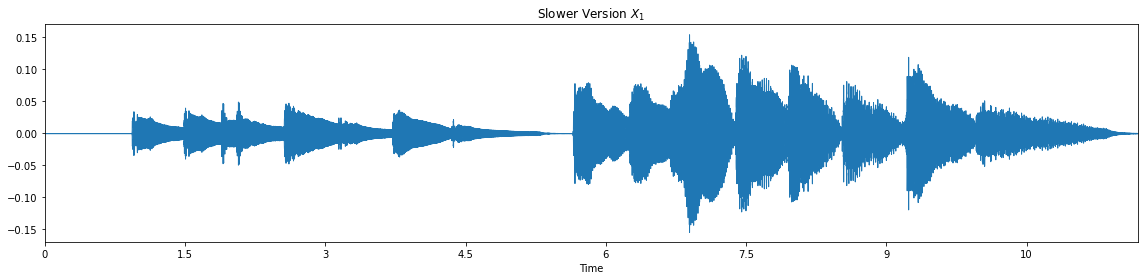

In [31]:
file_name = audio_files[3]
print(file_name)
x_1, fs = librosa.load(file_name)
plt.figure(figsize=(16, 4))
librosa.display.waveplot(x_1, sr=fs)
plt.title('Slower Version $X_1$')
plt.tight_layout()

audio/short files/fast.WAV


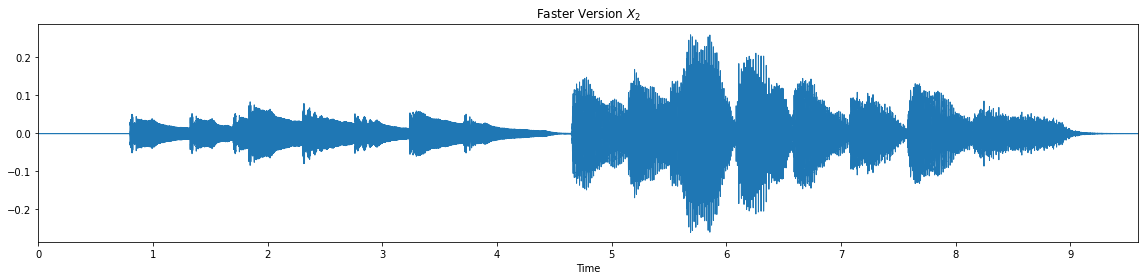

In [33]:
file_name = audio_files[1]
print(file_name)
x_2, fs = librosa.load(file_name)
plt.figure(figsize=(16, 4))
librosa.display.waveplot(x_2, sr=fs)
plt.title('Faster Version $X_2$')
plt.tight_layout()

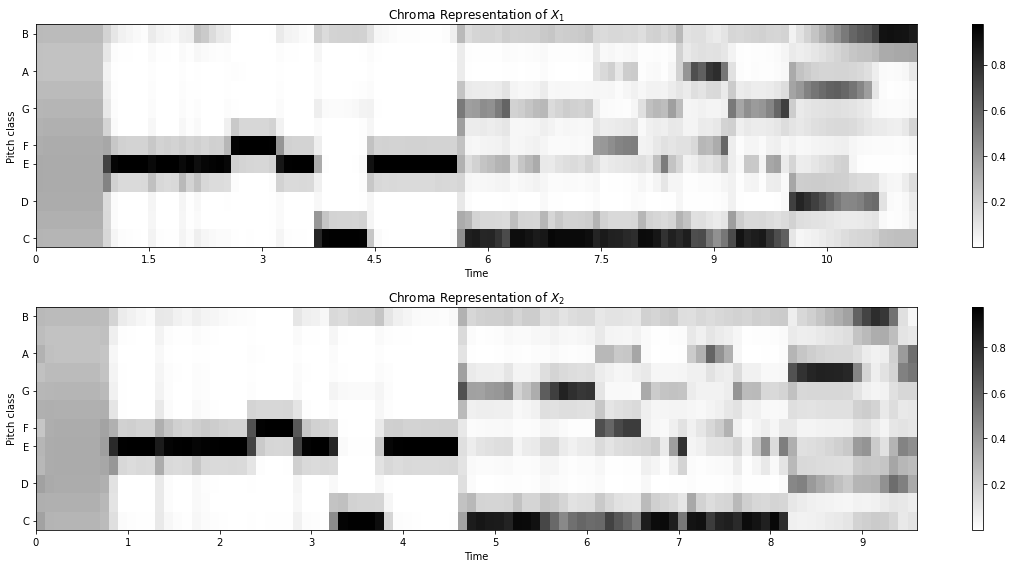

In [34]:
n_fft = 4410
hop_size = 2205

x_1_chroma = librosa.feature.chroma_stft(y=x_1, sr=fs, tuning=0, norm=2,
                                         hop_length=hop_size, n_fft=n_fft)
x_2_chroma = librosa.feature.chroma_stft(y=x_2, sr=fs, tuning=0, norm=2,
                                         hop_length=hop_size, n_fft=n_fft)

plt.figure(figsize=(16, 8))
plt.subplot(2, 1, 1)
plt.title('Chroma Representation of $X_1$')
librosa.display.specshow(x_1_chroma, x_axis='time',
                         y_axis='chroma', cmap='gray_r', hop_length=hop_size)
plt.colorbar()
plt.subplot(2, 1, 2)
plt.title('Chroma Representation of $X_2$')
librosa.display.specshow(x_2_chroma, x_axis='time',
                         y_axis='chroma', cmap='gray_r', hop_length=hop_size)
plt.colorbar()
plt.tight_layout()

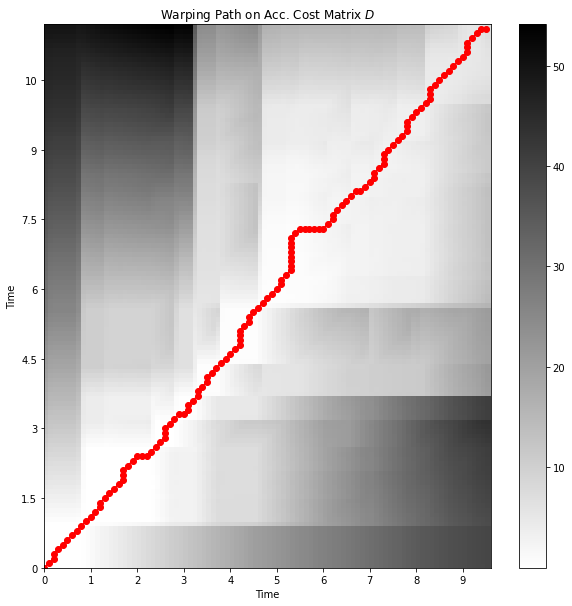

In [36]:
D, wp = librosa.sequence.dtw(X=x_1_chroma, Y=x_2_chroma, metric='cosine')
wp_s = np.asarray(wp) * hop_size / fs

fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111)
librosa.display.specshow(D, x_axis='time', y_axis='time',
                         cmap='gray_r', hop_length=hop_size)
imax = ax.imshow(D, cmap=plt.get_cmap('gray_r'),
                 origin='lower', interpolation='nearest', aspect='auto')
ax.plot(wp_s[:, 1], wp_s[:, 0], marker='o', color='r')
plt.title('Warping Path on Acc. Cost Matrix $D$')
plt.colorbar()

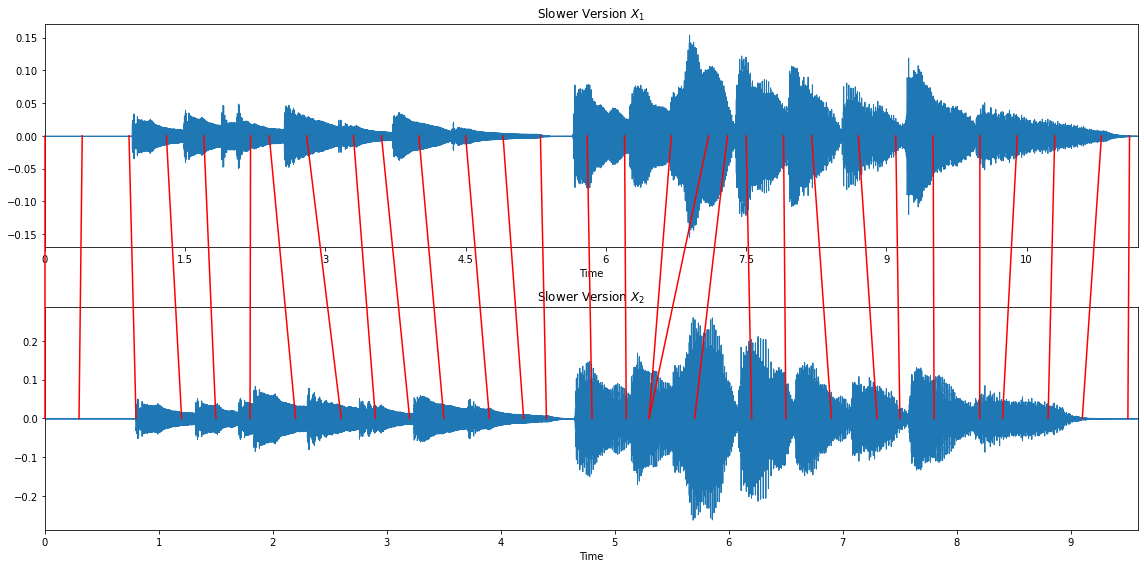

In [37]:
fig = plt.figure(figsize=(16, 8))

# Plot x_1
plt.subplot(2, 1, 1)
librosa.display.waveplot(x_1, sr=fs)
plt.title('Slower Version $X_1$')
ax1 = plt.gca()

# Plot x_2
plt.subplot(2, 1, 2)
librosa.display.waveplot(x_2, sr=fs)
plt.title('Slower Version $X_2$')
ax2 = plt.gca()

plt.tight_layout()

trans_figure = fig.transFigure.inverted()
lines = []
arrows = 30
points_idx = np.int16(np.round(np.linspace(0, wp.shape[0] - 1, arrows)))

# for tp1, tp2 in zip((wp[points_idx, 0]) * hop_size, (wp[points_idx, 1]) * hop_size):
for tp1, tp2 in wp[points_idx] * hop_size / fs:
    # get position on axis for a given index-pair
    coord1 = trans_figure.transform(ax1.transData.transform([tp1, 0]))
    coord2 = trans_figure.transform(ax2.transData.transform([tp2, 0]))

    # draw a line
    line = matplotlib.lines.Line2D((coord1[0], coord2[0]),
                                   (coord1[1], coord2[1]),
                                   transform=fig.transFigure,
                                   color='r')
    lines.append(line)

fig.lines = lines
plt.tight_layout()
